# Import Libraies

In [24]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# Read Dataset

In [25]:
df = pd.read_csv('./diabetes.csv')

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Checking Null Value

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Chaking Duplicate Value

In [29]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Checking Statistical Data Of DataFrame

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Computing the correlation matrix

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [33]:
print("Number of samples for Outcome 0 are : ",len(df[df['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(df[df['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


/home/kashan/venv/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

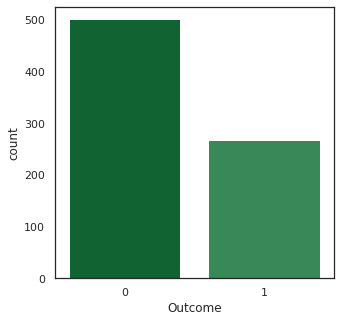

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(df["Outcome"])

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

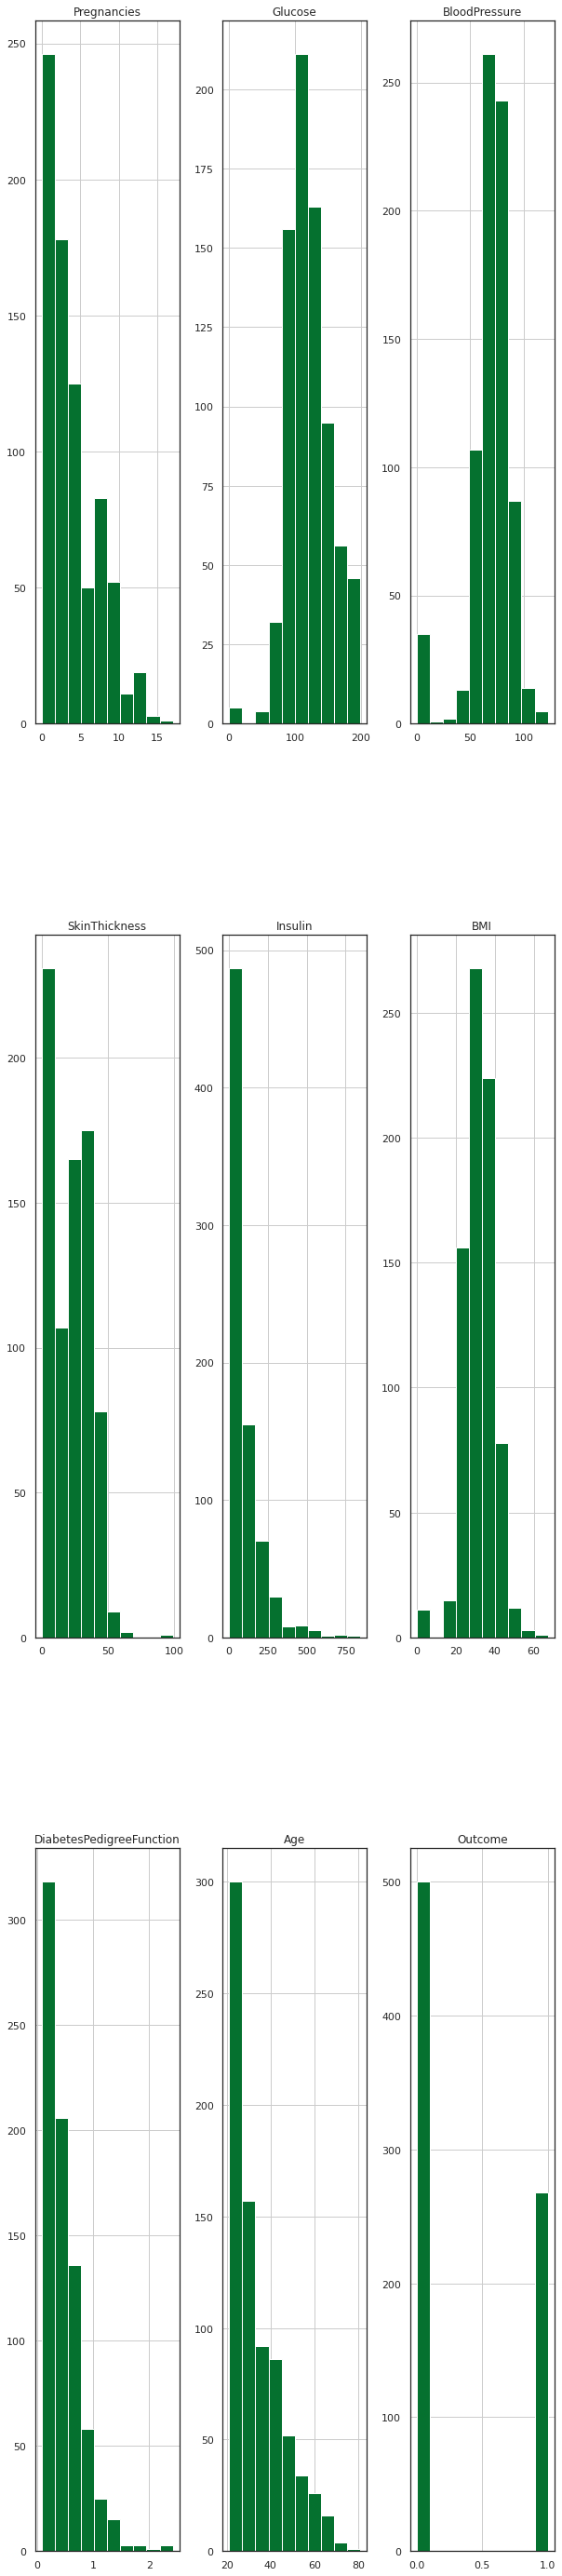

In [35]:
df.hist()

# #Distplot For Various Features

In [36]:
columns=df.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


/home/kashan/venv/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kashan/venv/ml/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/kashan/venv/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kashan/venv/ml/lib/python3.8/sit

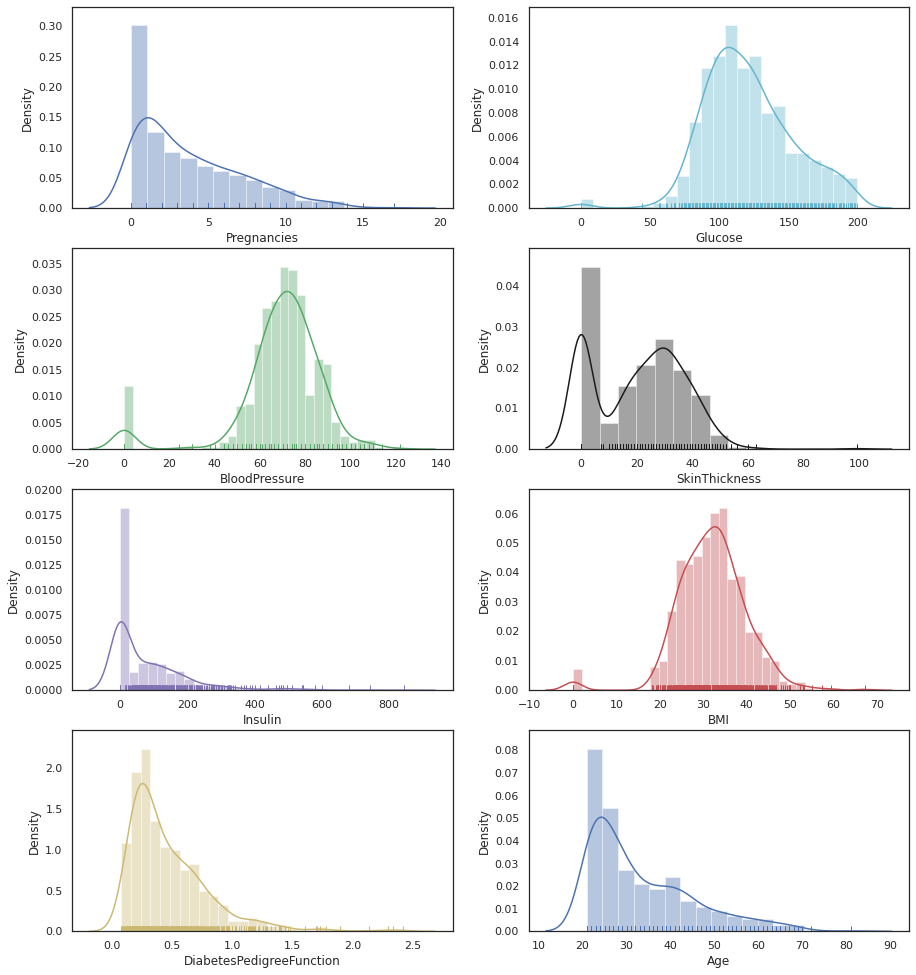

In [37]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color=colours[i])

# ScatterPlot Of All Attributes Against Each Other

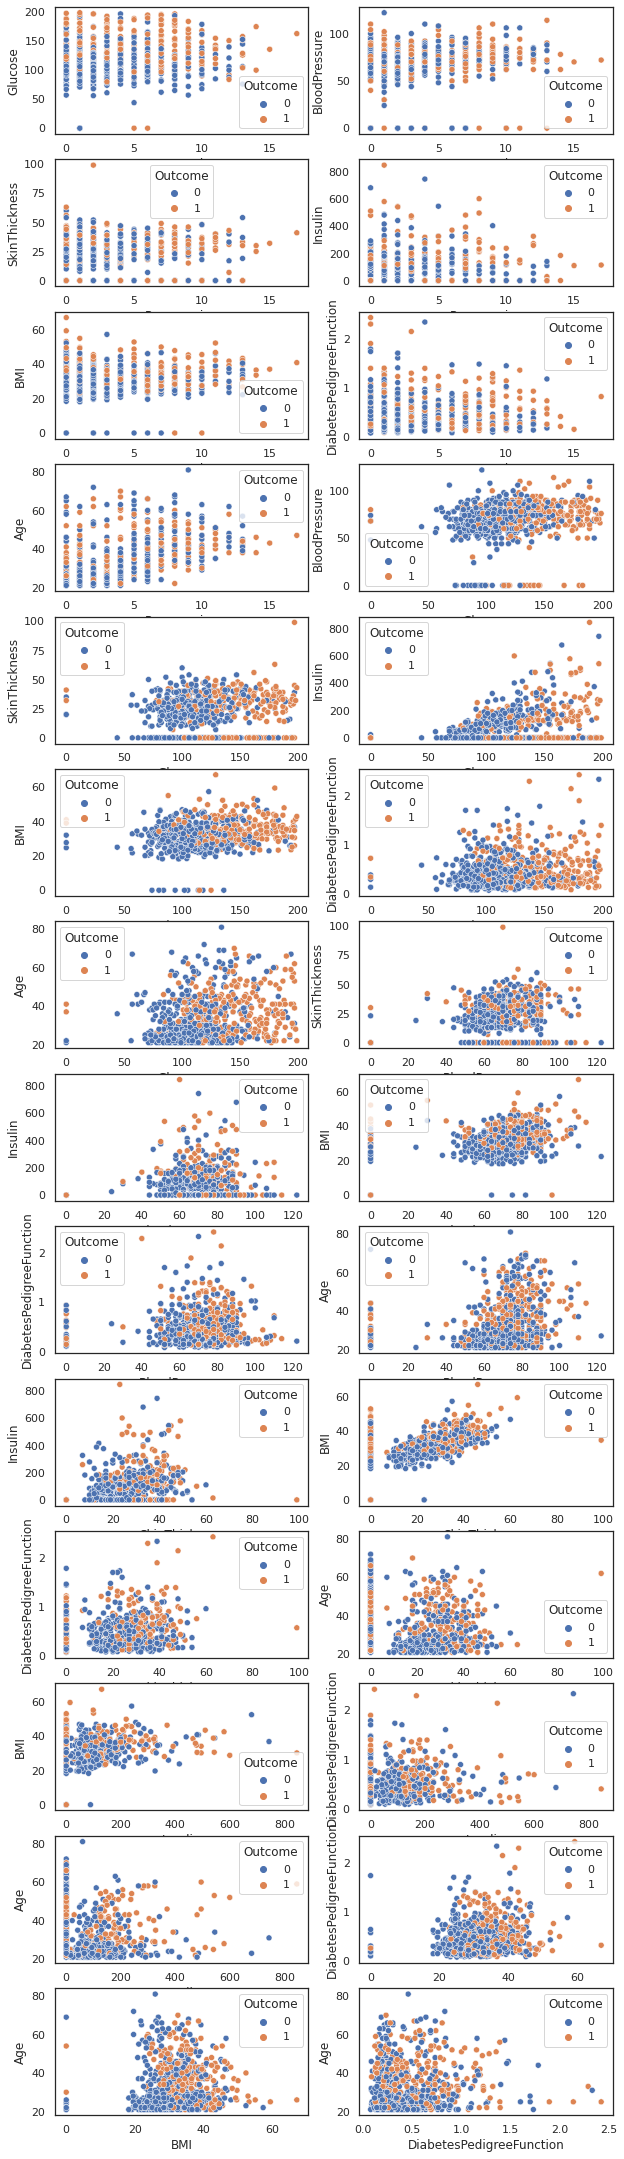

In [38]:
sns.set(rc={'figure.figsize':(10,50)})
j=1

sns.set_style(style='white')
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=df[columns[i]],y=df[columns[k]],hue="Outcome",data=df)
            j=j+1
        except:
            break

# Correlations of each features in dataset

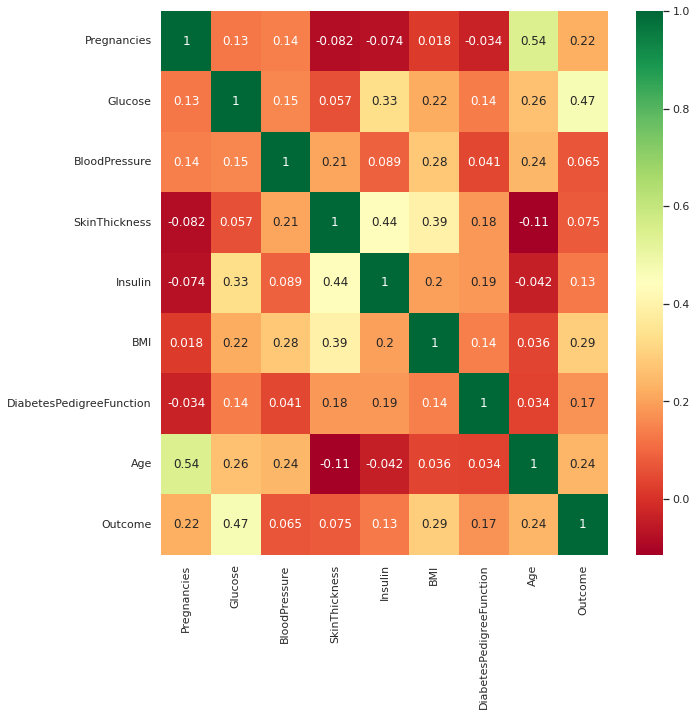

In [39]:
corrmat = df.corr()
top_corr_features = corrmat.index
corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# KDEplot

/home/kashan/venv/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


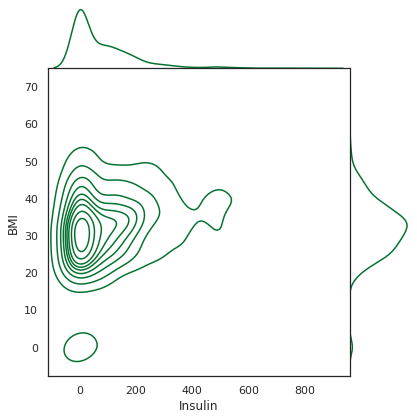

In [40]:
with sns.axes_style("white"):
    sns.set_palette("BuGn_r")
    g2 = sns.jointplot("Insulin", "BMI", data=df,
                kind="kde", space=0)

In [41]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1:]
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

# Feature Importance

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
model = ExtraTreesClassifier()

In [44]:
model.fit(x,y)

/tmp/ipykernel_3147755/1265173374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


ExtraTreesClassifier()

In [45]:
model.feature_importances_

array([0.10907992, 0.22997917, 0.10119841, 0.08113454, 0.07424085,
       0.14380752, 0.11790863, 0.14265096])

In [46]:
top = pd.Series(model.feature_importances_,index = x.columns)
top

Pregnancies                 0.109080
Glucose                     0.229979
BloodPressure               0.101198
SkinThickness               0.081135
Insulin                     0.074241
BMI                         0.143808
DiabetesPedigreeFunction    0.117909
Age                         0.142651
dtype: float64

<AxesSubplot:>

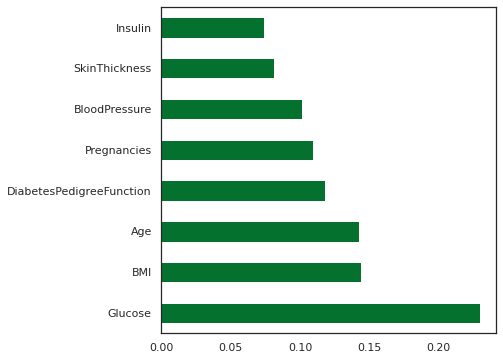

In [47]:
plt.figure(figsize=(6,6))
top.nlargest(10).plot(kind = 'barh')

# Split Data set

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30,random_state=1)

# Feature Scaling

In [49]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [50]:
xtrain,xtest

(array([[ 3.3536084 ,  0.48047259,  0.05216975, ...,  0.68611992,
         -0.94690147,  0.81020454],
        [-1.12101735, -0.76891126, -0.2463932 , ...,  0.64699564,
          0.39612987, -0.69526203],
        [-0.82270897, -0.16023707,  0.05216975, ..., -0.5788985 ,
         -0.7936697 , -1.02981015],
        ...,
        [ 2.75699163,  0.16011776,  1.04737957, ...,  1.50772982,
          0.34505262,  0.72656751],
        [ 0.07221618,  1.60171451,  0.15169073, ...,  1.53381267,
          0.03258   , -0.611625  ],
        [ 1.5637581 , -0.60873384,  0.3507327 , ...,  0.13837998,
          0.59142526,  1.06111563]]),
 array([[ 0.96714133,  0.48047259,  0.25121172, ..., -0.76147848,
          0.53734346,  1.47930079],
        [-0.82270897,  0.96100484, -0.44543516, ..., -0.74843705,
         -0.86878331, -0.94617312],
        [ 0.66883295, -0.38448546, -0.44543516, ..., -0.89189275,
         -0.78766061, -0.52798796],
        ...,
        [-0.82270897, -0.96112415, -0.74399811, ..., -

# LogisticRegression

In [51]:
log =LogisticRegression()
log.fit(xtrain,ytrain)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
log_test =log.score(xtest,ytest)
log_test

0.7835497835497836

In [53]:
y_pred_log = log.predict(xtest)
accuracy_score(ytest,y_pred_log)

0.7835497835497836

In [54]:
confusion_matrix(ytest,y_pred_log)

array([[132,  14],
       [ 36,  49]])

In [55]:
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



# Gaussian Naive Bayes

In [56]:
gnb = GaussianNB()
gnb.fit(xtest,ytest)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [57]:
gnb_test = gnb.score(xtest,ytest)
gnb_test

0.8051948051948052

In [58]:
y_pred_gnb = gnb.predict(xtest)
accuracy_score(ytest,y_pred_gnb)

0.8051948051948052

In [59]:
confusion_matrix(ytest,y_pred_gnb)

array([[123,  23],
       [ 22,  63]])

In [60]:
print(classification_report(ytest,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       146
           1       0.73      0.74      0.74        85

    accuracy                           0.81       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



# Support Vector Machine

In [61]:
svm = SVC()
svm.fit(xtrain,ytrain)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [62]:
svm_test = svm.score(xtest,ytest)
svm_test

0.7922077922077922

In [63]:
y_pred_svm = svm.predict(xtest)
accuracy_score(ytest,y_pred_svm)

0.7922077922077922

In [64]:
con_mat_svm =confusion_matrix(ytest,y_pred_svm)
con_mat_svm

array([[134,  12],
       [ 36,  49]])

In [65]:
print(classification_report(ytest,y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.80      0.58      0.67        85

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



# K Nearest Neighbours

In [66]:
knnc = KNeighborsClassifier()
knnc.fit(xtest,ytest)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [67]:
knnc_test = knnc.score(xtest,ytest)
knnc_test

0.8398268398268398

In [68]:
y_pred_knnc = knnc.predict(xtest)
accuracy_score(ytest,y_pred_knnc)

0.8398268398268398

In [69]:
con_mat_knnc = confusion_matrix(ytest,y_pred_knnc)
con_mat_knnc

array([[137,   9],
       [ 28,  57]])

In [70]:
print(classification_report(ytest,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       146
           1       0.86      0.67      0.75        85

    accuracy                           0.84       231
   macro avg       0.85      0.80      0.82       231
weighted avg       0.84      0.84      0.83       231



# RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

/tmp/ipykernel_3147755/2814167547.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


RandomForestClassifier()

In [72]:
rfc_test = rfc.score(xtest,ytest)
rfc_test

0.7792207792207793

In [73]:
y_pred_rfc = rfc.predict(xtest)
accuracy_score(ytest,y_pred_rfc)

0.7792207792207793

In [74]:
confusion_matrix(ytest,y_pred_rfc)

array([[128,  18],
       [ 33,  52]])

In [75]:
print(classification_report(ytest,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       146
           1       0.74      0.61      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



# Gradient Boosting

In [76]:
xgb = GradientBoostingClassifier()
xgb.fit(xtest,ytest)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [77]:
XGB_test = xgb.score(xtest,ytest)
XGB_test

1.0

In [78]:
y_pred_xgb = xgb.predict(xtest)
accuracy_score(ytest,y_pred_xgb)

1.0

In [79]:
 confusion_matrix(ytest,y_pred_xgb)

array([[146,   0],
       [  0,  85]])

In [80]:
print(classification_report(ytest,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        85

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



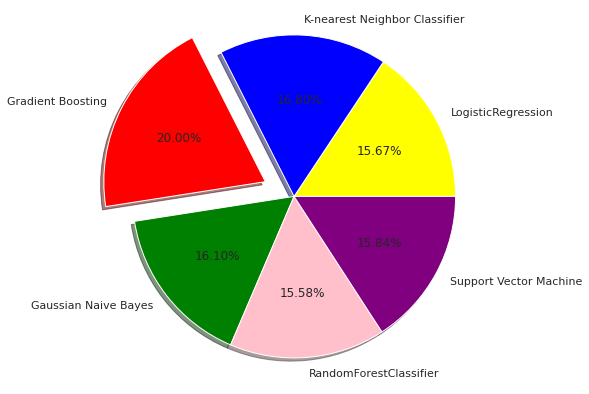

In [81]:
plt.figure(figsize=(7,7))
import matplotlib.pyplot as plt
Algorithm=["LogisticRegression","K-nearest Neighbor Classifier","Gradient Boosting","Gaussian Naive Bayes","RandomForestClassifier","Support Vector Machine"]
algo=[log_test,knnc_test,XGB_test, gnb_test, rfc_test,svm_test]
plt.pie(algo,explode=[0,0,0.2,0,0,0],labels=Algorithm,shadow =True, autopct="%.2f%%",colors=['yellow','blue','red','green','pink','purple'])
plt.axis("equal")
plt.show()

# Ensemble

In [82]:

log_clf = LogisticRegression()
rfc_clf = RandomForestClassifier()
gnb_clf = GaussianNB()
knnc_clf = KNeighborsClassifier()
xgb_clf = GradientBoostingClassifier()

voting_clf_hard = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf),('gnb', gnb_clf),('knnc', knnc_clf),('xgb', xgb_clf) ],
    voting='hard')

voting_clf_soft = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf), ('gnb', gnb_clf),('knnc', knnc_clf),('xgb', xgb_clf)],
    voting='soft')

In [83]:
voting_clf_hard.fit(xtrain, ytrain)
voting_clf_soft.fit(xtrain, ytrain)

for clf in (log_clf,rfc_clf,gnb_clf,knnc_clf,xgb_clf, voting_clf_hard,voting_clf_soft):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, y_pred))
    a_row = pd.Series([clf.__class__.__name__, accuracy_score(ytest, y_pred)])
    row_df = pd.DataFrame([a_row])
    df = pd.concat([row_df, df], ignore_index=False)

/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

LogisticRegression 0.7835497835497836
RandomForestClassifier 0.8095238095238095
GaussianNB 0.7835497835497836
KNeighborsClassifier 0.7922077922077922
GradientBoostingClassifier 0.7965367965367965


/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.8008658008658008


/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kashan/venv/ml/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.8311688311688312
